<a href="https://colab.research.google.com/github/AribelGuzman/Estadistica_Python/blob/main/Hipotesis_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

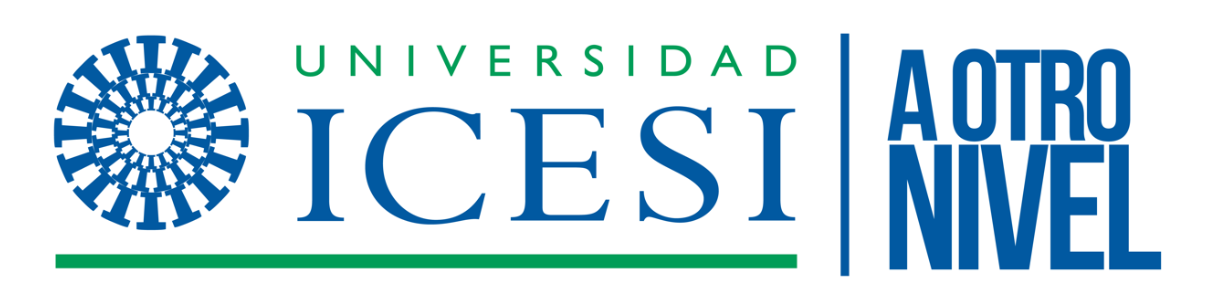

## **Presentado Por:** Diana Guzmán, Sebastian Barrera, Gustavo Restrepo

In [ ]:
## Libreria de funciones estadísticas
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import norm ## distribución normal
from scipy.stats import poisson ## distribución Poisson
from scipy.stats import t ## distribución t
from scipy.stats import f ## distribución F
from scipy.stats import ttest_1samp  ## Prueba t una población
from scipy.stats import ttest_ind ## Prueba t comparación medias
from scipy.stats import shapiro ## Prueba normalidad Shapiro-Wilks
from scipy.stats import anderson ## Prueba normalidad Anderson-Darling
from scipy.stats import levene ## Prueba homogeneidad de varianzas Levene
from scipy.stats import mannwhitneyu ## Prueba Mann-Whitney-Wilcoxon (comparación dos poblaciones)
from scipy.stats import f_oneway ## Prueba ANOVA de una vía
from scipy.stats import chi2_contingency ## Prueba chi cuadrado de Pearson
from scipy.stats import pearsonr ## Coeficiente de correlación de Pearson con prueba
import statsmodels.stats as sm  ## estadísticas
import statsmodels.api as sm1  ## estadísticas
from statsmodels.graphics.gofplots import qqplot ## Gráfico QQ plot
import pingouin as pg ## LIbrería funciones estadísticas
from scipy.stats import skew, kurtosis  ## funciones estadísticas


# **Descripción Ejercicio Práctico**

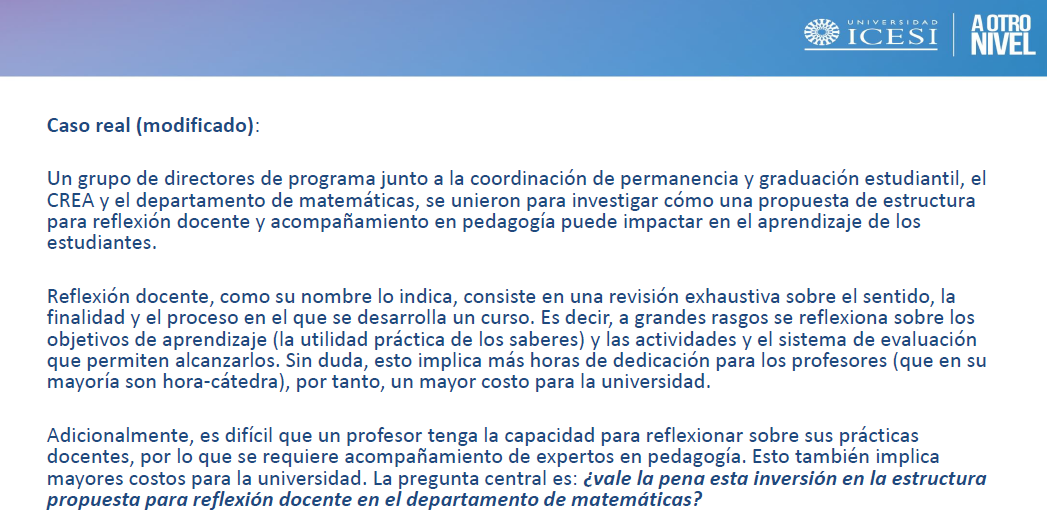

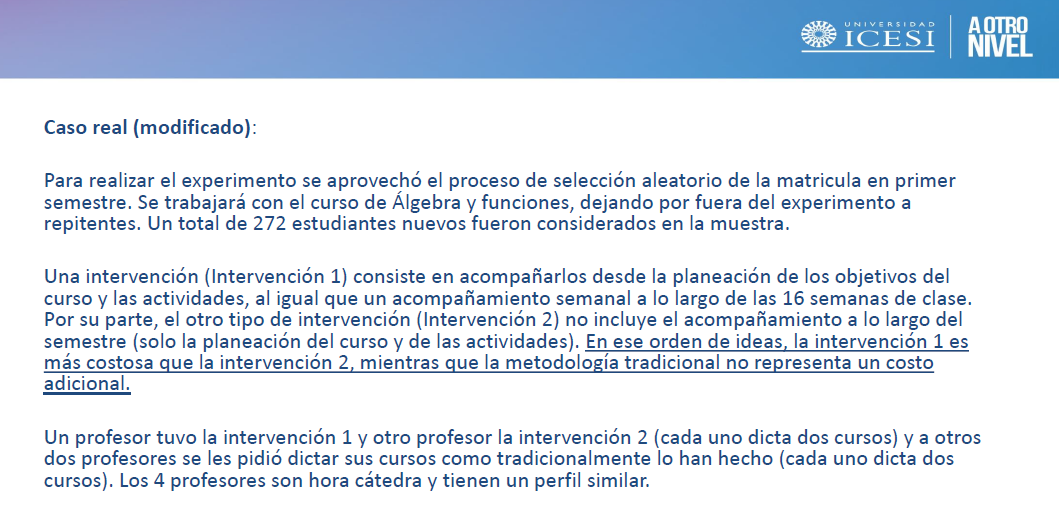

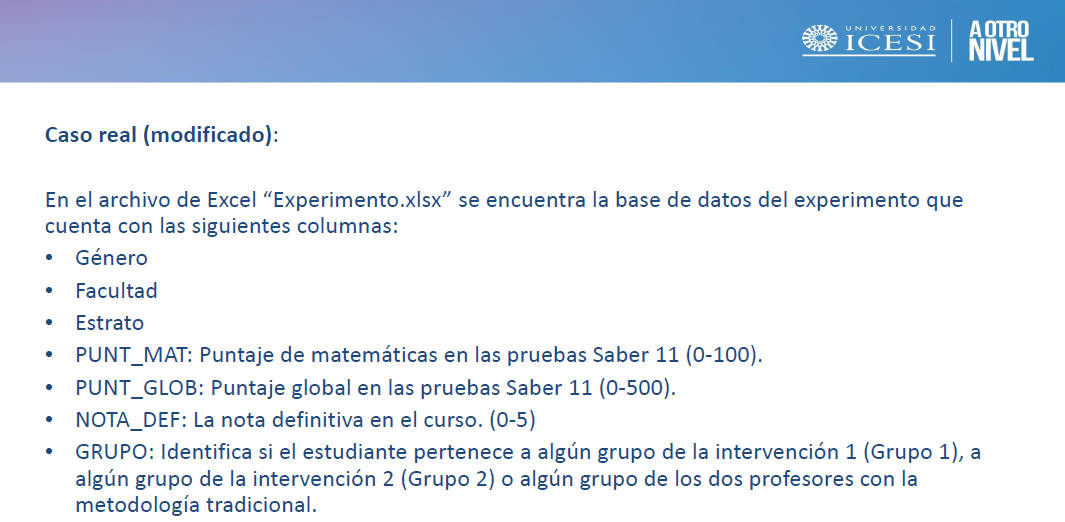

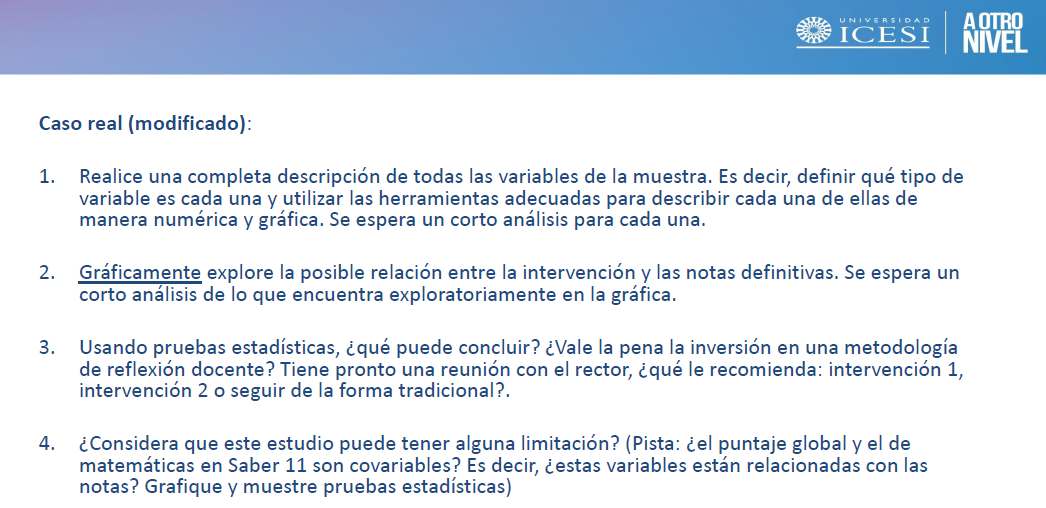

# **Punto 1**

Realice una completa descripción de todas las variables de la muestra. Es decir, definir qué tipo de variable es cada una y utilizar las herramientas adecuadas para describir cada una de ellas de manera numérica y gráfica. Se espera un corto análisis para cada una.

In [ ]:
## Cargo los datos
url = "https://raw.githubusercontent.com/GARF1094/EDA/main/Experimento.xlsx"
data = pd.read_excel(url)
data

,Unnamed: 0,Género,Facultad,Estrato,PUNT_MAT,PUNT_GLOB,NOTA_DEF,GRUPO
0,1,M,FCN,2,63,324,2.35,Tradicional
1,2,M,FING,1,67,353,3.09,Tradicional
2,3,M,FCN,2,52,306,2.68,Tradicional
3,4,M,FING,4,58,277,2.77,Tradicional
4,5,F,FCAE,3,72,372,3.79,Tradicional
...,...,...,...,...,...,...,...,...
267,268,M,FING,1,66,337,3.41,Grupo2
268,269,F,FCN,2,79,381,3.89,Grupo2
269,270,F,FCN,6,80,362,3.89,Grupo2
270,271,M,FING,3,79,389,2.74,Grupo2


In [ ]:
#Limpiamos una columna innecesaria
data= data.drop(['Unnamed: 0'], axis=1) 
data

,Género,Facultad,Estrato,PUNT_MAT,PUNT_GLOB,NOTA_DEF,GRUPO
0,M,FCN,2,63,324,2.35,Tradicional
1,M,FING,1,67,353,3.09,Tradicional
2,M,FCN,2,52,306,2.68,Tradicional
3,M,FING,4,58,277,2.77,Tradicional
4,F,FCAE,3,72,372,3.79,Tradicional
...,...,...,...,...,...,...,...
267,M,FING,1,66,337,3.41,Grupo2
268,F,FCN,2,79,381,3.89,Grupo2
269,F,FCN,6,80,362,3.89,Grupo2
270,M,FING,3,79,389,2.74,Grupo2


In [ ]:
#Renombramos las columnas para evitar que fallen por tíldes
columnas = ["Genero","Facultad","Estrato","PUNT_MAT","PUNT_GLOB","NOTA_DEF","GRUPO"] 
data.columns = columnas
data

,Genero,Facultad,Estrato,PUNT_MAT,PUNT_GLOB,NOTA_DEF,GRUPO
0,M,FCN,2,63,324,2.35,Tradicional
1,M,FING,1,67,353,3.09,Tradicional
2,M,FCN,2,52,306,2.68,Tradicional
3,M,FING,4,58,277,2.77,Tradicional
4,F,FCAE,3,72,372,3.79,Tradicional
...,...,...,...,...,...,...,...
267,M,FING,1,66,337,3.41,Grupo2
268,F,FCN,2,79,381,3.89,Grupo2
269,F,FCN,6,80,362,3.89,Grupo2
270,M,FING,3,79,389,2.74,Grupo2


**Describimos las variables:**
>**Género:**	Cualitativa Nominal

>**Facultad:**	Cualitativa Nominal

>**Estrato:**	Cualitativa Ordinal

>**PUNT_MAT:**	Cuantitativa Discreta

>**PUNT_GLOB:**	Cuantitativa Discreta

>**NOTA_DEF:**	Cuantitativa Continua

>**GRUPO:**	Cualitativa Nominal

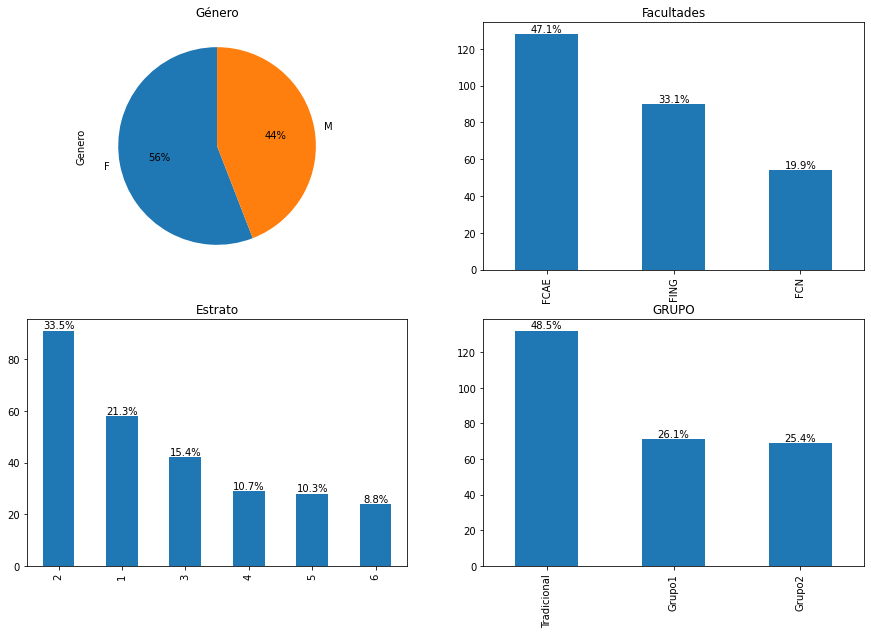

In [ ]:
fig, axs = plt.subplots(figsize=[15, 10], ncols=2, nrows=2)

### GRÁFICO PASTEL SEXOS

ax1 = data["Genero"].value_counts().plot(kind="pie",startangle=90, autopct='%1.0f%%', title="Género", ax = axs[0,0],)

### GRÁFICO BARRA FACULTAD

counts = data["Facultad"].value_counts()
percentages = counts / counts.sum() * 100

ax2 = counts.plot(kind="bar", title="Facultades", ax = axs[0,1])
ax2.bar_label(ax2.containers[0], labels=[f"{p:.1f}%" for p in percentages])

### GRÁFICO BARRA ESTRATO

counts2 = data["Estrato"].value_counts()
percentages2 = counts2 / counts2.sum() * 100

ax3 = counts2.plot(kind="bar", title="Estrato", ax = axs[1,0])
ax3.bar_label(ax3.containers[0], labels=[f"{p:.1f}%" for p in percentages2])

### GRÁFICO BARRA GRUPO

counts3 = data["GRUPO"].value_counts()
percentages3 = counts3 / counts3.sum() * 100

ax4 = counts3.plot(kind="bar", title="GRUPO", ax = axs[1,1])
ax4.bar_label(ax4.containers[0], labels=[f"{p:.1f}%" for p in percentages3])

plt.show()

**Análisis**:

De las variables estudiadas, es posible visualizar que:
1. La distribucipon de género de la muestra es de 56% femenino y 44% masculino. Si bien, hay más datos femeninos, no se encuentra tan desbalanceada.

2. La distribucipon de Facultades de la muestra es de 47% en Ciencias Económicas, 33% en la facultad de Ingeniería y el 19.9% restante en Ciencias Naturales. Es decir, casi la mitad de la muestra se encuentra en la facultad de Ciencias Económicas.

3. La distribucipon de estratos de la muestra es del 33% en estrato 2, 21% en estrato 1, 15% en estrato 3, 11% ene strato 4, 10% en estrato 5 y 9% en estrato 6. Es decir, alrededor del 50% de los datos de la muestra se encuentran en estratos bajos (1 y 2).

4. La distribucipon de grupos de la muestra es del 48% en el grupo tradicional, 26% en el grupo 1 y 25% en el grupo 2. Es decir, casi la mitad de la muestra se encuentra en el grupo tradicional.

In [ ]:
def fun_tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

In [ ]:
#Generamos tabla con las principales variables estadísticas
fun_tabla_descriptivas(data[["PUNT_MAT","PUNT_GLOB","NOTA_DEF"]])

,PUNT_MAT,PUNT_GLOB,NOTA_DEF
count,272.000000,272.000000,272.000000
mean,68.808824,339.264706,3.415846
std,10.006282,35.383140,0.511079
min,39.000000,219.000000,2.290000
25%,62.000000,316.750000,3.090000
50%,69.000000,341.000000,3.440000
75%,76.000000,362.000000,3.812500
max,95.000000,423.000000,4.780000
coef. variation,0.145421,0.104294,0.149620
skew,-0.232233,-0.339606,-0.130085


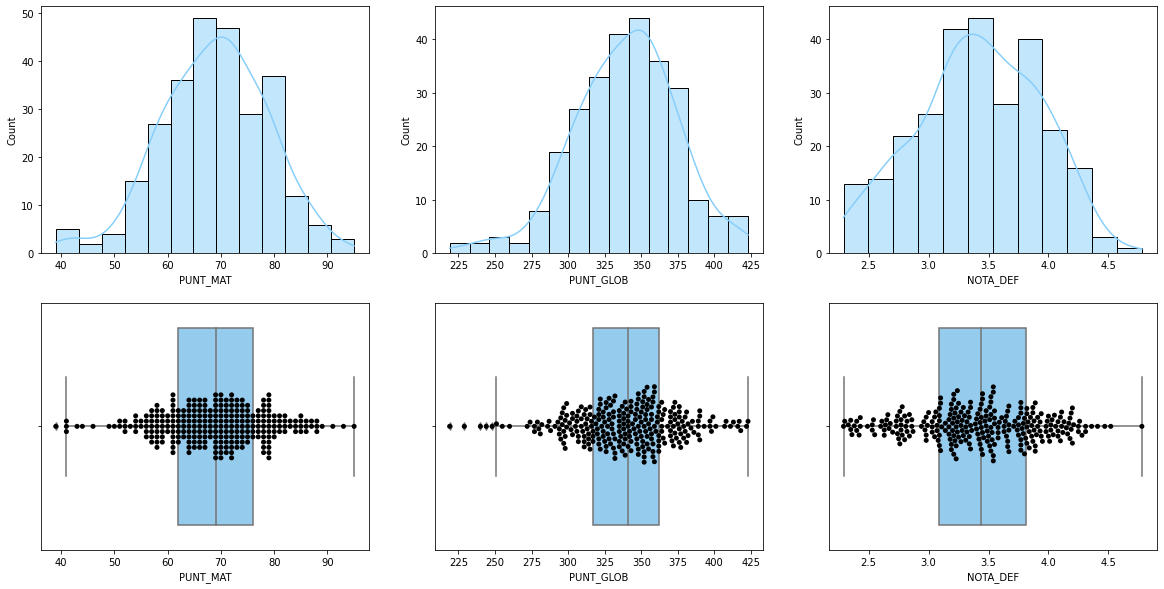

In [ ]:
fig, axs = plt.subplots(figsize=[20, 10], ncols=3, nrows = 2)

ax1 = sns.histplot(x=data["PUNT_MAT"],kde=True,color="lightskyblue", ax = axs[0,0])

ax2 = sns.histplot(x=data["PUNT_GLOB"],kde=True,color="lightskyblue", ax = axs[0,1])

ax3 = sns.histplot(x=data["NOTA_DEF"],kde=True,color="lightskyblue", ax = axs[0,2])

ax4 = sns.boxplot(x=data['PUNT_MAT'],color="lightskyblue", ax = axs[1,0])
ax4 = sns.swarmplot(x=data['PUNT_MAT'],color='black', ax = axs[1,0]) 

ax5 =sns.boxplot(x=data['PUNT_GLOB'],color="lightskyblue", ax = axs[1,1])
ax5 = sns.swarmplot(x=data['PUNT_GLOB'],color='black', ax = axs[1,1]) 

ax6 =sns.boxplot(x=data['NOTA_DEF'],color="lightskyblue", ax = axs[1,2])
ax6 = sns.swarmplot(x=data['NOTA_DEF'],color='black', ax = axs[1,2]) 

plt.show()

**Análisis**:

Con respecto a las variables cuantitativas, podemos observar lo siguiente:

**PUNT_MAT**: es una distribución mayormente centrada, mesocurtica y con leve sesgo negativo (cola levemente hacia la izquierda)

**PUNT_GLOB**: es una distribución leptocurtica (un poco más puntiaguda)  y con un leve sesgo negativo (cola hacia la izquierda)

**NOTA_DEF**: es una distribución centrada, mesocurtica y con un leve sesgo negativo (cola levemente hacia la izquierda)


# **Punto 2**

Gráficamente explore la posible relación entre la intervención y las notas definitivas. Se espera un corto análisis de lo que encuentra exploratoriamente en la gráfica.

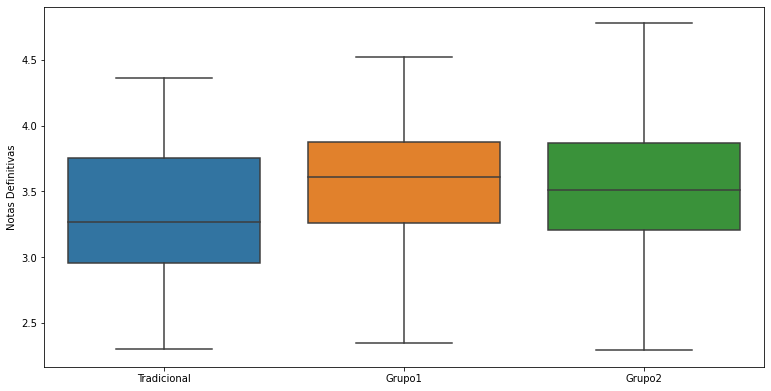

In [ ]:
fig_boxplot = plt.figure(figsize=(10,5)) 
ax = fig_boxplot.add_axes([0,0,1,1])
ax=sns.boxplot(x=data["GRUPO"], y=data["NOTA_DEF"])
plt.ylabel('Notas Definitivas')   
plt.xlabel('')           
plt.show()  

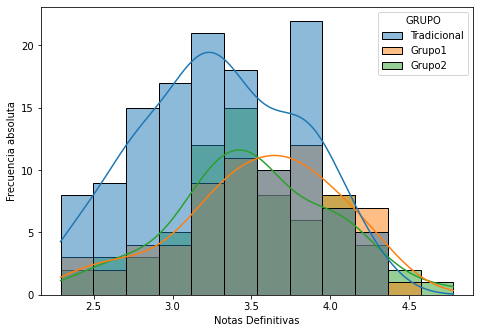

In [ ]:
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=data["NOTA_DEF"], hue=data["GRUPO"],kde=True)
plt.ylabel('Frecuencia absoluta')   
plt.xlabel('Notas Definitivas') 
plt.show() 

**Análisis**: 

De los gráficos anteriores, es posible observar que la media del grupo tradicional es considerablemente menor que la media de los grupos 1 y 2. Entre los grupos 1 y 2, en cambio, aunque se observa una leve diferencia, no es realmente significativa. En otras palabras, se observa que los resultados del grupo tradicional son considerablemente menores que los obtenidos por los grupos intervenidos.

# **Punto 3**

Usando pruebas estadísticas, ¿qué puede concluir? ¿Vale la pena la inversión en una metodología de reflexión docente? Tiene pronto una reunión con el rector, ¿qué le recomienda: intervención 1, intervención 2 o seguir de la forma tradicional?.

In [ ]:
# Normalidad
#Ho: los datos se distribuyen normal
#Ha: los datos no se distribuyen normal

print("Población: Tradicional")
Estad,vp = shapiro(data[data["GRUPO"]=="Tradicional"]["NOTA_DEF"])
print(f'Estadístico SW= {Estad}, Valor-p= {vp}')
print("Población: Grupo1")
Estad,vp = shapiro(data[data["GRUPO"]=="Grupo1"]["NOTA_DEF"])
print(f'Estadístico SW= {Estad}, Valor-p= {vp}')
print("Población: Grupo2")
Estad,vp = shapiro(data[data["GRUPO"]=="Grupo2"]["NOTA_DEF"])
print(f'Estadístico SW= {Estad}, Valor-p= {vp}')

Población: Tradicional
Estadístico SW= 0.9811262488365173, Valor-p= 0.06354282051324844
Población: Grupo1
Estadístico SW= 0.9728129506111145, Valor-p= 0.12597548961639404
Población: Grupo2
Estadístico SW= 0.9880001544952393, Valor-p= 0.7529125809669495


**Análisis**:

Dado que el valor-p NO es mayor que el alfa, no es posible rechazar la H0. Por tanto, es posible asumir normalidad.

In [ ]:
# Homogeneidad de varianzas:
#Ho: los datos tienen varianzas homogeneas
#Ha: los datos no tienen varianzas homogeneas

Estad,vp=levene(data[data["GRUPO"]=="Tradicional"]["NOTA_DEF"],
               data[data["GRUPO"]=="Grupo1"]["NOTA_DEF"],
               data[data["GRUPO"]=="Grupo2"]["NOTA_DEF"],
               center='mean')
print(f'Estadístico W= {Estad}, Valor-p= {vp}')

Estadístico W= 0.20888940467847075, Valor-p= 0.8116164835091431


**Análisis**:

Dado que el valor-p NO es mayor que el alfa, no es posible rechazar la H0. Por tanto, es posible asumir homogeneidad en las varianzas.

**Prueba ANOVA**

Dado que se cumplen los supuestos de normalidad y homogeneidad de varianzas, se procede a hacer una prueba ANOVA. 

**Recordemos las hipótesis**:

Ho: la media en todas las poblaciones es igual

Ha: la media de al menos una población es diferente

In [ ]:
# Prueba ANOVA (libreria stats)
Estad,vp=f_oneway(data[data["GRUPO"]=="Tradicional"]["NOTA_DEF"],
               data[data["GRUPO"]=="Grupo1"]["NOTA_DEF"],
               data[data["GRUPO"]=="Grupo2"]["NOTA_DEF"])
print(f'Estadístico F= {Estad}, Valor-p= {vp}')

Estadístico F= 7.059853566705065, Valor-p= 0.0010273138866285362


In [ ]:
# Prueba ANOVA (con la libreria pingouin)
aov = pg.anova(dv='NOTA_DEF', between='GRUPO', data=data,detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,GRUPO,3.530220,2,1.765110,7.059854,0.001027,0.049872
1,Within,67.255586,269,0.250021,NaN,NaN,NaN


**Análisis**: 

Dado que el valor-p NO es mayor que el alfa, no es posible rechazar la H0. Por tanto, con un 95% de confianza (incluso con un 99%) podemos afirmar que al menos una de las medias es diferente. 

Ahora bien, se procede a realizar una prueba HSD Tukey cuantificar las diferencias de medias entre grupos.

In [ ]:
# Prueba HSD Tukey
pg.pairwise_tukey(data=data, dv='NOTA_DEF', between='GRUPO')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Grupo1,Grupo2,3.549859,3.499565,0.050294,0.084528,0.595000,0.822919,0.099994
1,Grupo1,Tradicional,3.549859,3.300000,0.249859,0.073590,3.395278,0.002270,0.497910
2,Grupo2,Tradicional,3.499565,3.300000,0.199565,0.074280,2.686645,0.020872,0.397661


**Análisis**: 

La prueba HSD Tukey nos confirma diferencias en las medias del grupo 1 contra el tradicional y del grupo 2 contra el tradicional. Además, nos confirma que las medias entre los grupos 1 y 2 realmente no tienen una diferencia significativa. Lo anterior, se infiere de:

Grupo 1 vs Grupo 2: El valor P es mayor a un alfa de 5%, por tanto, con un nivel de confianza del 95%, no es posible rechazar la H0. Por tanto, no es posible afirmar que las medias de los grupos 1 y 2 son significativamente diferentes.

Grupo 1 vs Tradicional: El valor P es menor a un alfa de 5%, por tanto, con un nivel de confianza del 95%, es posible rechazar la H0. Por tanto, las medias del grupo 1 y el grupo tradicional son significativamente diferentes. 
    
Grupo 2 vs Tradicional: El valor P es menor a un alfa de 5%, por tanto, con un nivel de confianza del 95%, es posible rechazar la H0. Por tanto, las medias del grupo 2 y el grupo tradicional son significativamente diferentes. 
    
## **Recomendación**:
Encontramos que definitivamente sí hay diferencia en los resultados obtenidos entre los grupos con educación tradicional y los intervenidos. Por tanto, vale la pena revisar la opción de una intervención. Ahora bien, sin considerar la inversión económica, la intervención del grupo 1 es muy buena a nivel academico. No obstante, la intervención del Grupo 2, sigue siendo muy buena academicamente y además cuenta con un menor costo para la universidad, por lo tanto, consideramos que ésta seria la opción mas viable. 

# **Punto 4**

¿Considera que este estudio puede tener alguna limitación? (Pista: ¿el puntaje global y el de matemáticas en Saber 11 son covariables? Es decir, ¿estas variables están relacionadas con las notas? Grafique y muestre pruebas estadísticas)

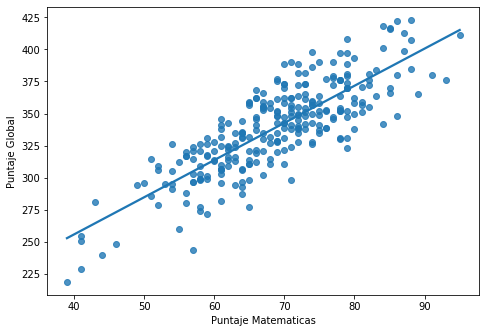

In [ ]:
# Diagrama de dispersión con línea de tendencia

fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.regplot(x=data["PUNT_MAT"],y=data["PUNT_GLOB"],ci=None)   
plt.ylabel('Puntaje Global')  
plt.xlabel('Puntaje Matematicas')         
plt.show()

In [ ]:
#Hipótesis de la prueba de Pearson:

# Ho: No hay correlación entre las variables (𝜌=0)
# Ha: Existe correlación entre las variables (𝜌≠0)

Coef,vp=pearsonr(data["PUNT_MAT"],data["PUNT_GLOB"])
print(f'Coeficiente de correlación= {Coef}, Valor-p= {vp}')

Coeficiente de correlación= 0.819051135403779, Valor-p= 4.1770440202733855e-67


**Análisis**

Dado que el valor-p es mayor que un alfa del 5%, es posible rechazar la H0. Por tanto, con un 95% de confianza podemos afirmar que existe una correlación lineal entre la variables. 

Ahora bien, esta prueba también nos dice qué tan fuerte es esta correlación lineal, para este caso, un coeficiente de 0.81 se podría interpretar como una correlación fuerte. Por tanto, el puntaje global y el pubntaje de matemáticas de la prueba Saber 11 son variables relacionadas.